<a href="https://colab.research.google.com/github/udula27/Logistic-Regression-using-SciKit-Learn-module/blob/main/Pattern_Recognition_play_around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as model_selection
import pandas as pd

#importing the dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing(as_frame=True)

In [ ]:
type(housing.data)

pandas.core.frame.DataFrame

In [ ]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


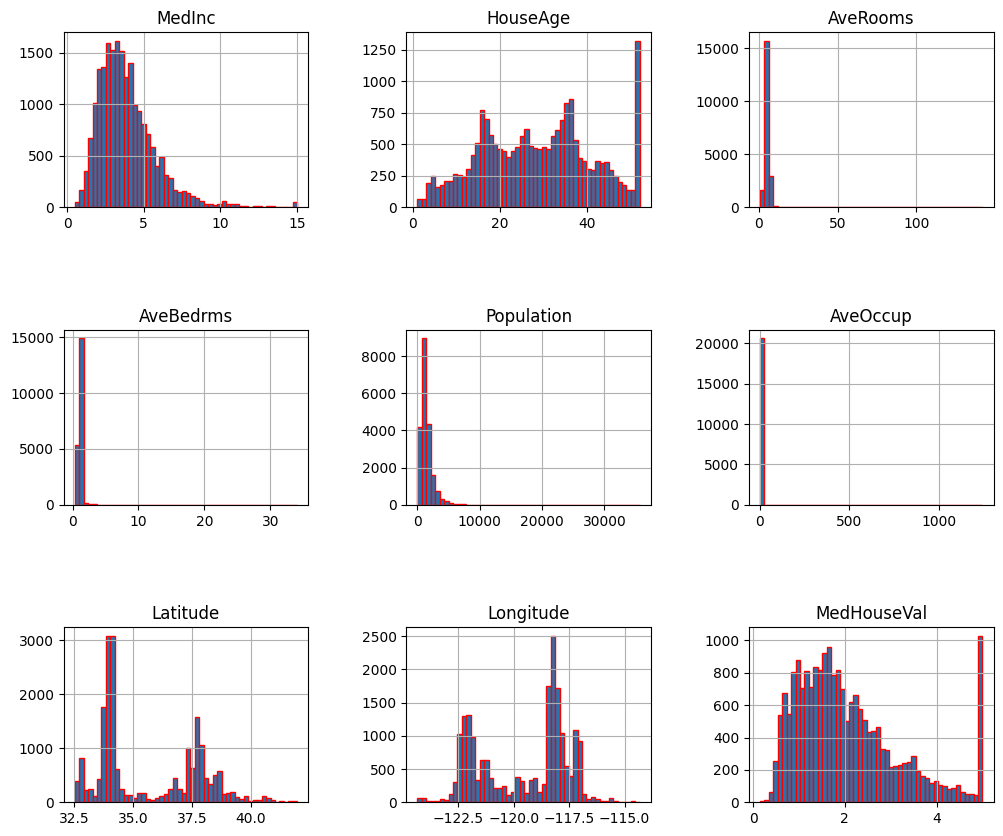

In [ ]:
#using hist to plot a histogram

housing.frame.hist(figsize = (12,10), bins = 50, edgecolor="red")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "Population", "AveOccup"]
housing.frame[features_of_interest].describe()


,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,1425.476744,3.070655
std,2.474173,0.473911,1132.462122,10.386050
min,0.846154,0.333333,3.000000,0.692308
25%,4.440716,1.006079,787.000000,2.429741
50%,5.229129,1.048780,1166.000000,2.818116
75%,6.052381,1.099526,1725.000000,3.282261
max,141.909091,34.066667,35682.000000,1243.333333


A large gap between Q3 and max value indicates outliers.

In [ ]:
#linear regression on a single variable

features_of_interest = ["AveRooms"]
housing.frame[features_of_interest].describe()

,AveRooms
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


In [ ]:
#loading the dataset

data_x, data_y = fetch_california_housing(return_X_y=True)

In [ ]:
#selecting "AveRooms" data
data_x = data_x[:,2]

#save index of the maximum value
index_max = np.argmax(data_x)
max_x = data_x[index_max]
max_y = data_y[index_max]


In [ ]:
print(np.max(data_x))
print(np.min(data_x))
print(np.mean(data_x))

141.9090909090909
0.8461538461538461
5.428999742190376


In [ ]:
#selecting 100 points to perform regression

data_x = data_x[100:200]
data_y = data_y[100:200]

#using train test splits to create training and testing datasets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print("Total dataset elements",data_x.shape)
print("Train dataset elements",X_train.shape)
print("Validatiom dataset elements",X_val.shape)
print("Test dataset elements",X_test.shape)

Total dataset elements (100,)
Train dataset elements (64,)
Validatiom dataset elements (16,)
Test dataset elements (20,)


We must convert the existing np array of 100 scalars into a np array of 100 1 dimensional tensors.

In [ ]:
#reshape the data as vectors

print(X_train.shape)

(64,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1)
print(X_train.shape)

(64, 1)


In [ ]:
X_test = X_test.reshape(X_test.shape[0], 1)
X_val = X_val.reshape(X_val.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

<h1>Performin linear regression</h1>

In [ ]:
regr = linear_model.LinearRegression()

#train the model

regr.fit(X_train, y_train)

print("Intercept w_0: \n", regr.intercept_)
print("Coefficients w_1: \n", regr.coef_)

Intercept w_0: 
 [-0.25554274]
Coefficients w_1: 
 [[0.5182619]]


We can use the equation of ordinary least squares method to calculate the coefficients as well.

In [ ]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)

intercept = np.ones((X_train.shape[0],1))
X_train_with_intercept = np.hstack((intercept, X_train))


# Calculate beta_hat using the normal equation
X_transpose = X_train_with_intercept.T
X_transpose_X = np.dot(X_transpose, X_train_with_intercept)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_transpose, y_train)
beta_hat = np.dot(X_transpose_X_inv, X_transpose_y)

# Extract the intercept and coefficients
intercept_hat = beta_hat[0]
coefficients = beta_hat[1:]

print("Intercept w_0 :", intercept_hat)
print("Coefficient w_1:", coefficients)


(64, 1)
Intercept w_0 : [-0.25554274]
Coefficient w_1: [[0.5182619]]


In [ ]:
yhat = regr.predict(X_train)

#residual sum of squares (RSS)

RSS = np.sum((yhat - y_train)**2)
print("RSS: ", RSS)

N = len(y_train)
print('Number of datapoints=', N)

#Residual standard error
RSE = np.sqrt(1/(N-2)*RSS)
print("RSE: ", RSE)

#Total sum of squares TSS

TSS = np.sum((y_train - np.mean(y_train))**2)
print("TSS: ", TSS)

#R-squared calculated

R2 = 1 - RSS/TSS
print("R2: ", R2)

#calculation of R2 using scikit learn

R2 = regr.score(X_train, y_train)

print('R2 (from scikit learn)=', R2)


RSS:  23.19847485678463
Number of datapoints= 64
RSE:  0.6116935092862911
TSS:  54.128554484375
R2:  0.5714189104480665
R2 (from scikit learn)= 0.5714189104480665


In [ ]:
from scipy.stats import t


w_1=regr.coef_
w_0=regr.intercept_
sigma2 = np.var(y_train - yhat)
SE2w0 =  sigma2*(1/N + np.mean(X_train)**2/np.sum((X_train - np.mean(X_train))**2))
SE2w1 = sigma2/np.sum((X_train - np.mean(X_train))**2)
tw1 = (w_1 - 0)/np.sqrt(SE2w1)
tw0 = (w_0 - 0)/np.sqrt(SE2w0)

print('Standard errors for intecept and w1: ', SE2w0, SE2w1)
print('t-statistic for intecept and w1: ', tw0, tw1)
pw1 = t.sf(np.abs(tw1), N-2)

pw0 = t.sf(np.abs(tw0), N-2)
print('p-value  for intecept and w1: ', pw0, pw1)

Standard errors for intecept and w1:  0.08236337737193469 0.0031477265137502914
t-statistic for intecept and w1:  [-0.89042321] [[9.2374221]]
p-value  for intecept and w1:  [0.18834049] [[1.45839149e-13]]


Mean squared error: 0.28
Coefficient of determination: 0.75


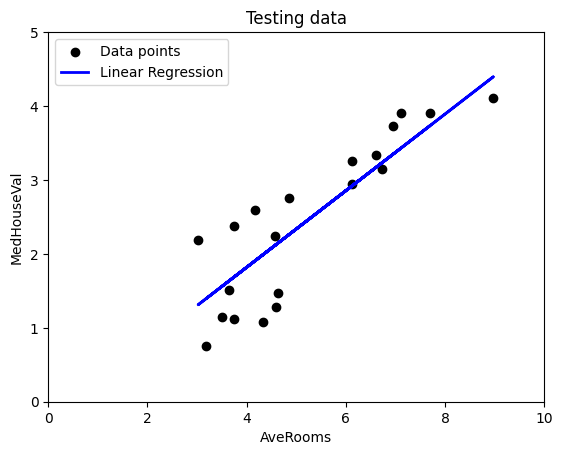

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

Coefficients: 
 [[0.02271367]]
intercept: 
 [2.18922706]


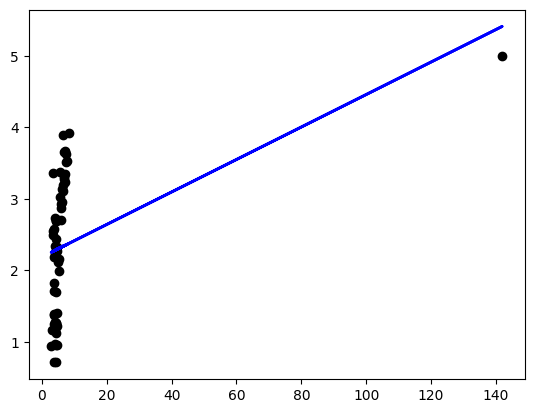

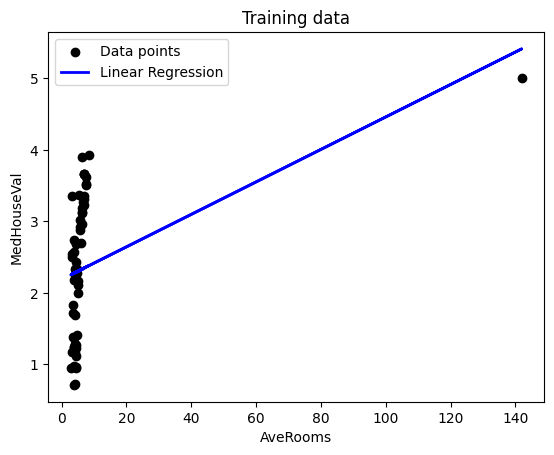

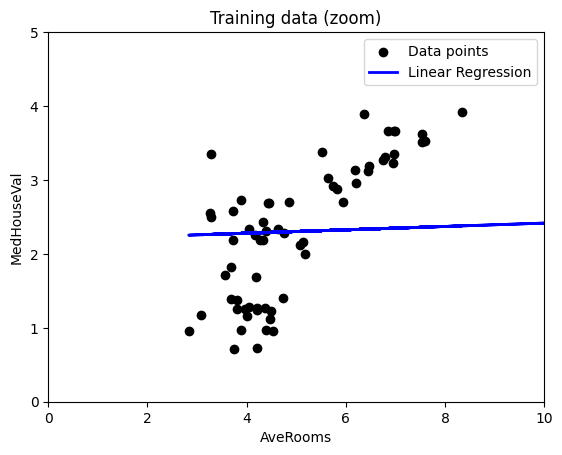

Coefficients: 
 [[0.02271367]]
Coefficients: 
 [2.18922706]


In [ ]:
# load maximum x value and corresponding y value to the training dataset
X_train[59,:]=max_x
y_train[59,:]=max_y
# Train the model using the training sets
regr.fit(X_train, y_train)
# The coefficients
print("Coefficients: \n", regr.coef_)
print("intercept: \n", regr.intercept_)

#see how training line look like


# Plot outputs
plt.scatter(X_train, y_train, color="black", )
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2)

plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()


# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)

Mean squared error: 1.07
Coefficient of determination: 0.04


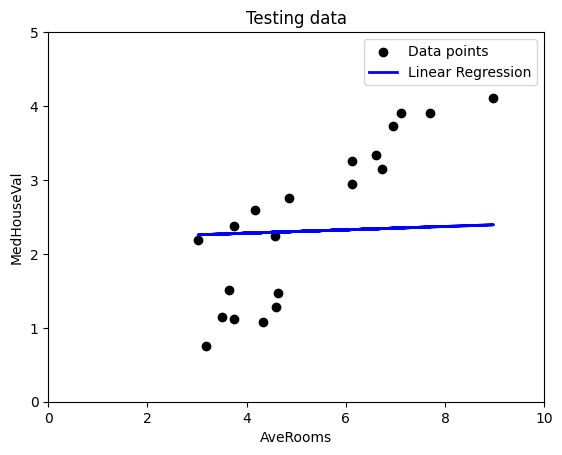

In [ ]:
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))




# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

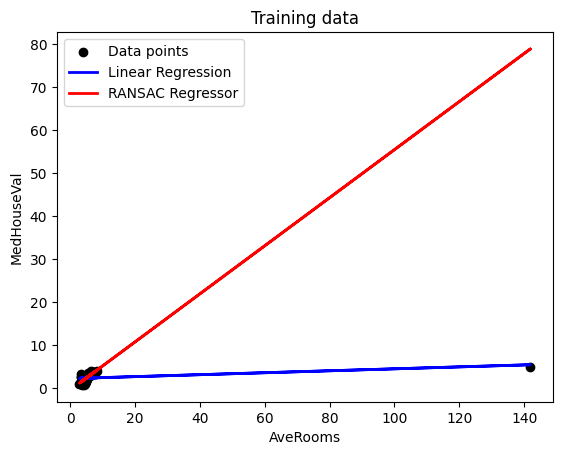

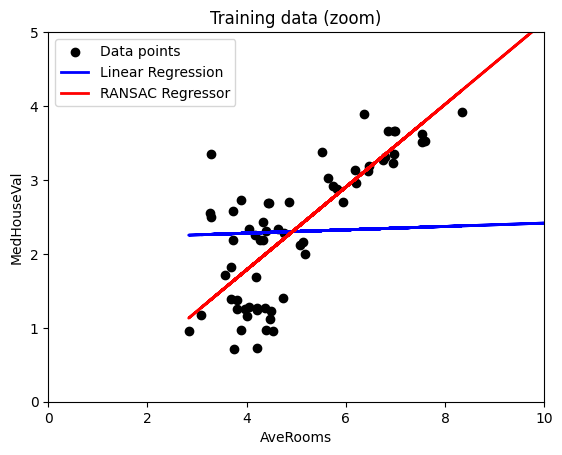

In [ ]:
# Train the model using the training sets
ransac = linear_model.RANSACRegressor()
#The RANSAC regressor automatically splits the data into inliers and outliers, and the fitted line is determined only by the identified inliers.

ransac.fit(X_train, y_train)

# Plot outputs
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()